# Simulating Brownian motion

Jacob L. Fine

December 22nd, 2024

When drawing samples from a continuous probability distribution, we are often doing so implictly at one particular point in time. As will be shown, we can extend this idea by sampling at a series of time points to model how some random variable changes over time. We can think of some continuous random variable $X$ as a function of time, and write it $X_t$. Let us assume our random variable follows as a normal distribution, where variance is proportional to the time that has passed. In statistics, we can describe this by a Weiner process, where

$$X_t \sim N(\mu,\sigma^2 t)$$

To explain this further, $X_t$ can model the position of a particle at some time point, and $\mu$ is the expected value of its position. As $t$ increases, we are less certain of the particle's location, which we represent by scaling the variance by time.

To implement a Weiner process, we initialize the random variable at $t=0$ as $X_0=0$, and update the value of the random variable at each time increment $\Delta t$, simply by summing the previous random variable with the value after a specific time increment has passed. Therefore

$$\Delta X_t \sim N(\mu,\sigma^2 \Delta t)$$

and

$$X_t = X_{t-1} + \Delta X_t$$

Therefore, to simulate a Weiner process, we just need to generate random values of the increment $\Delta X_t$ from a normal distribution, and to evaluate it at a particular point, we take the cumulative sum of all previous increments starting at $X_0=0$. We may also do this in multiple dimensions, i.e., plotting the value of $(X_t,Y_t,Z_t)$ over time. This may be used to model the position of a particle over time.


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# a function to plot a Weiner process in n dimensions (1d, 2d, or 3d)
def brownian_motion_plotter(n_dimensions=1, n_steps=1000, dt=0.01, sigma=1.0,col=str):
    """
    A function to plot Brownian motion in 1d, 2d, or 3d.

    Inputs:
        n_dimensions (int): Number of dimensions (can be 1, 2 or 3)
        n_steps (int): the number of time steps to iterate over
        dt (float): The time increment of the delta X distribution
        sigma (float): The standard deviation (to be scaled by dt)
    """
    if n_dimensions < 1 or n_dimensions > 3:
        raise ValueError("Only dimensions of 1, 2 or 3 are supported.")
    
    # Generates the increments to be used for Brownian motion from a normal distribution 
    # with a variance given by the equation above $$\Delta X_t \sim N(\mu,\sigma^2 \Delta t)$$

    increments = np.random.normal(0, sigma * np.sqrt(dt), (n_dimensions, n_steps))
    
    # Each position is the cumulative sum of all previous positions. 
    # Recall that each position is updated by adding the current position to the newest sample from the distribution \Delta X_t.
    positions = np.cumsum(increments, axis=1)
        
    if n_dimensions == 1:
        plt.figure(figsize=(10, 6))
        plt.plot(
            np.linspace(0, n_steps * dt, n_steps),
            positions[0],
            label='1D Brownian motion',
            color=col 
        )
        plt.xlabel('time')
        plt.ylabel('X(t)')
        plt.title('1D Brownian motion')
        plt.legend()
        plt.grid()
        plt.show()

    elif n_dimensions == 2:
        plt.figure(figsize=(8, 8))
        plt.plot(
            positions[0],
            positions[1],
            label='2D Brownian motion',
            color=col  # 2D plot in green
        )
        plt.xlabel('X(t)')
        plt.ylabel('Y(t)')
        plt.title('2D Brownian motion')
        plt.axis('equal')  # Equal scaling for both axes
        plt.legend()
        plt.grid()
        plt.show()

    elif n_dimensions == 3:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(
            positions[0],
            positions[1],
            positions[2],
            label='3D Brownian motion',
            color=col  # 3D plot in red
        )
        ax.set_xlabel('X(t)')
        ax.set_ylabel('Y(t)')
        ax.set_zlabel('Z(t)')
        ax.set_title('3D Brownian motion')
        ax.legend()
        plt.show()


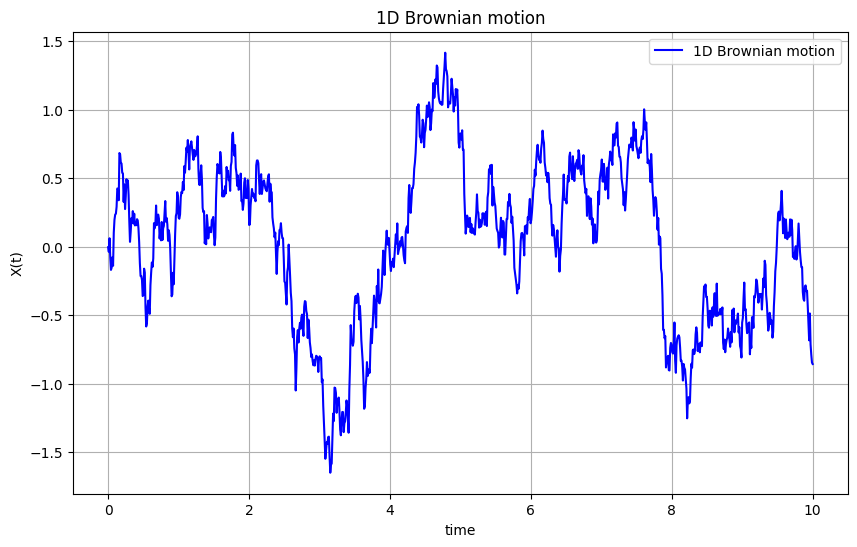

In [48]:
# plot for 1d
brownian_motion_plotter(n_dimensions=1, n_steps=1000, dt=0.01, sigma=1.0,col='blue')

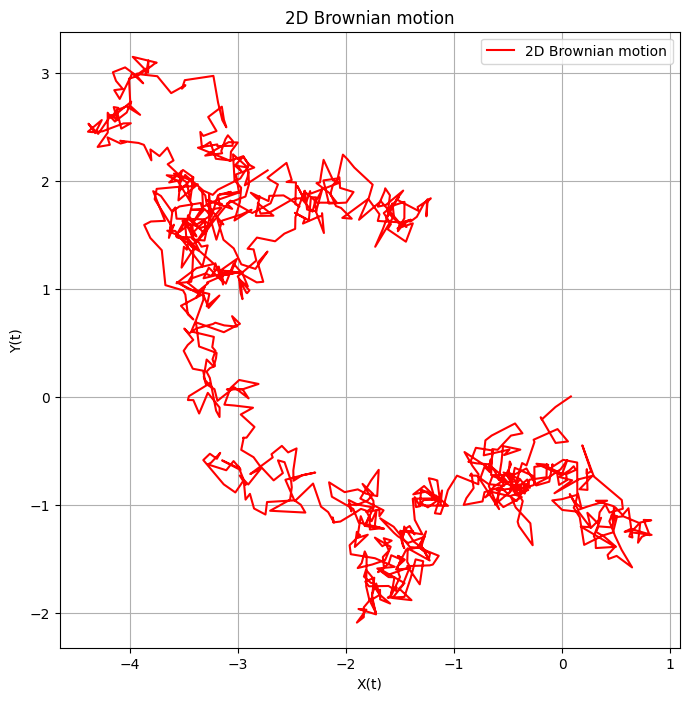

In [52]:
# plot for 2d
brownian_motion_plotter(n_dimensions=2, n_steps=1000, dt=0.01, sigma=1.0,col='red')

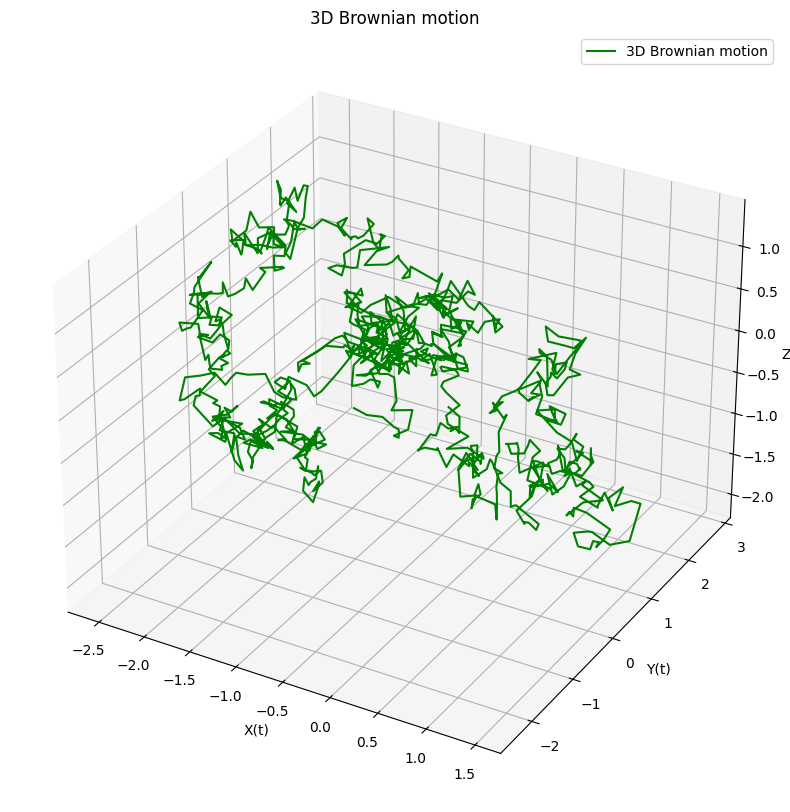

In [61]:
# plot for 3d
brownian_motion_plotter(n_dimensions=3, n_steps=1000, dt=0.01, sigma=1.0,col='green')